In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as sk

In [2]:
cijene = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/cene.parquet", columns=['art','datum','redna_cena','akcijska_cena'])

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
dostupnost = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/availability.parquet")

In [4]:
kolicina = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/training/training.prodaja.parquet", columns=['art','datum','kol'])

In [5]:
podaci_0 = pd.merge(cijene, dostupnost, on=['art','datum'], how='inner')

In [6]:
podaci_1 = pd.merge(podaci_0, kolicina, on=['art','datum'], how='inner')

In [7]:
#podaci_1.describe()

In [8]:
brojac = 0

for art, new_df in podaci_1.groupby(level=0):
    if brojac == 5:
        break
    if len(new_df.index) > 800:
        brojac = brojac + 1
        print("artikl:", art, "duljina:", len(new_df.index))        

artikl: 38 duljina: 815
artikl: 39 duljina: 869
artikl: 40 duljina: 869
artikl: 41 duljina: 867
artikl: 57 duljina: 801


In [9]:
podaci_2 = podaci_1.loc[[38,39,40,41,57]]

In [10]:
podaci_2.head(100)

redna_cena  akcijska_cena  n_trgovin     kol
art datum                                                   
38  2017-01-16       0.099          0.099        425    58.0
    2018-04-08       0.100          0.100        380   403.0
39  2016-11-28       0.100          0.100        462  2504.0
40  2017-01-14       0.769          0.769        321   137.0
41  2016-01-08       1.631          1.586        176    36.0
38  2018-01-17       0.099          0.099        397    18.0
39  2017-01-19       0.100          0.100        458  3883.0
    2018-01-19       0.100          0.100        449  4024.0
40  2018-04-15       0.769          0.769        258    33.0
39  2017-05-11       0.100          0.100        462  5080.0
40  2017-04-19       0.768          0.768        294    44.0
41  2016-07-16       1.631          1.631        157    38.0
40  2017-07-15       0.769          0.769        233    90.0
38  2017-07-27       0.100          0.100        417   572.0
39  2017-05-09       0.100          0.100        464  3647.0
40  2016-12-23       0.540          0.540        323   665.0
    2017-06-16       0.770          0.431        263   172.0
39  2018-02-25       0.100          0.100        423  1783.0
57  2016-08-28       0.080          0.080         94    23.0
    2017-02-08       0.080          0.080         87    13.0
38  2017-12-24       0.100          0.100        399   353.0
39  2017-09-10       0.100          0.100        440  2348.0
40  2017-11-30       0.769          0.769        301   198.0
41  2017-04-06       1.631          1.631        113    40.0
57  2017-07-21       0.080          0.080         81    59.0
38  2016-03-15       0.100          0.100        443   220.0
40  2016-08-31       0.770          0.513        326   449.0
39  2016-10-27       0.100          0.100        461  3432.0
    2017-05-23       0.100          0.100        462  3766.0
38  2017-02-17       0.100          0.100        422   262.0
...                    ...            ...        ...     ...
39  2016-10-28       0.100          0.100        461  4428.0
40  2017-11-06       0.770          0.770        292    74.0
38  2016-04-30       0.100          0.100        443   735.0
    2017-03-14       0.100          0.100        412   171.0
40  2017-04-05       0.770          0.770        293    98.0
38  2016-09-16       0.100          0.100        447   270.0
39  2016-07-03       0.100          0.100        460  1453.0
    2017-06-03       0.100          0.100        462  9528.0
40  2016-01-19       0.770          0.642        449   212.0
    2016-06-02       0.769          0.769        346   145.0
57  2017-12-17       0.080          0.080         80    30.0
40  2016-02-03       0.770          0.625        449   234.0
57  2017-05-24       0.080          0.080         83    86.0
    2017-11-20       0.081          0.081         79    20.0
38  2016-07-05       0.100          0.100        443   394.0
39  2017-09-21       0.100          0.100        457  5472.0
    2018-01-26       0.100          0.100        456  3854.0
40  2018-04-30       0.769          0.769        258   146.0
41  2016-06-16       1.631          1.631        165    57.0
    2017-12-04       1.631          1.631         98    41.0
40  2016-01-15       0.770          0.597        450   271.0
    2017-06-01       0.769          0.769        265   127.0
    2017-07-30       0.770          0.359        238    73.0
57  2017-08-17       0.080          0.080         81    60.0
38  2017-03-11       0.100          0.100        415   375.0
39  2017-09-02       0.100          0.100        455  6630.0
57  2016-12-12       0.081          0.081         91    36.0
39  2016-12-22       0.100          0.100        463  4726.0
41  2017-07-06       1.632          1.632        101    37.0
38  2016-10-28       0.100          0.100        438   225.0

[100 rows x 4 columns]

## Odvajanje podataka u testni i trening set

In [11]:
finalna_tablica = podaci_2

In [34]:
dataParquet = podaci_2.to_parquet('dataParquet.parquet')

In [35]:
podaci = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/dataParquet.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


* Kako bi se izbjeglo da treniramo podatke na podacima koji su u budućnosti, ručno ćemo odvojiti podatke t.d u trening setu ostavimo podatke iz prvog četveromjesečja.

In [12]:
X_train = finalna_tablica.loc[finalna_tablica.index.get_level_values('datum') <= '2018-01-01']
X_test = finalna_tablica.loc[finalna_tablica.index.get_level_values('datum') > '2018-01-01']
y_train = X_train['kol']
y_test = X_test['kol']

In [13]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3535, 4) (3535,)
(686, 4) (686,)


### Preprocesiranje **TRAINING** podataka

In [14]:
std_scaler = StandardScaler()

In [15]:
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train_scaled = std_scaler.transform(X_train)

### Fittamo model na podacima trening seta

In [17]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)

In [18]:
predictions = model.predict(X_train_scaled)

In [19]:
print(X_train_scaled)

[[-0.73120284 -0.70742389  0.89606398 -0.47253749]
 [-0.7295619  -0.7057627   1.13654767  1.06735727]
 [ 0.36822831  0.4055762   0.22010983 -0.42280255]
 ...
 [ 1.78436124  1.83918674 -0.74182494 -0.50401531]
 [ 1.78272041  1.83752566 -1.09280114 -0.4926833 ]
 [ 1.78272041  1.83752566 -1.16429629 -0.47001927]]


In [20]:
model.score(X_train_scaled, y_train)

1.0

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(y_train, predictions)
mae

3.9952802970739347e-13

In [23]:
mse = mean_squared_error(y_train, predictions)
mse

2.1713856700367645e-25

### TEST 

In [24]:
X_test_scaled = std_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.424691693173754e-13

In [26]:
mse = mean_squared_error(y_train, predictions)
mse

2.1713856700367645e-25

In [27]:
koeficijenti = model.coef_
print(koeficijenti)

[ 9.60455234e-13 -1.30739863e-12 -4.97379915e-13  1.58842024e+03]


In [28]:
koeficijenti = model.coef_
print(koeficijenti)

[ 9.60455234e-13 -1.30739863e-12 -4.97379915e-13  1.58842024e+03]


In [29]:
odsjecak = model.intercept_
print(odsjecak)

808.588118811881


In [30]:
paramtetri = model.get_params
print(paramtetri)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


> prvih pet predviđenih vrijednosti:

In [31]:
predictions[0:5]

array([  58., 2504.,  137.,   36., 3883.])

Text(0, 0.5, 'predviđene količine')

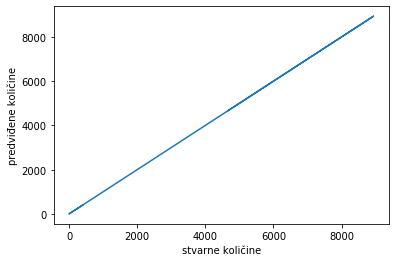

In [32]:
plt.plot(y_test, y_pred)

plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")